# Machine Learning
## Assignment 1
### Morgan Reilly -- 20235398

## References:
* https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#tutorial-setup
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
* https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

## Imports

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import csv

from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler

## Text Processing

* Create csv file from text file
* Read in text file and transpose to csv
* Do this for both test and train data

#### CSV Generation

In [2]:
"""
Read CSV
    Load csv from disk, pass in output location
    Convert to CSV and return
"""
def read_csv(file_in, file_out):
    data = pd.read_csv(file_in, sep="\t", header=None)
    data.columns = ['calorific_value', 'nitrogen', 'turbidity',
                        'style', 'alcohol', 'sugars', 'bitterness',
                        'beer_id', 'colour', 'degree_of_fermentation']
    data.to_csv(file_out, index = None)
    data = pd.read_csv(file_out)
    return data

#### Training Data

In [3]:
# Read in and store training data as datafram
training_data = read_csv("data/beer_training.txt", "data/beer_training.csv")
training_data.describe()

,calorific_value,nitrogen,turbidity,alcohol,sugars,bitterness,beer_id,colour,degree_of_fermentation
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,41.638096,0.322277,1.858922,3.998486,17.365645,8.935387,90.032258,11.321226,67.143733
std,2.623812,0.135035,0.891977,0.250500,1.113639,3.419934,50.833370,2.842828,5.862946
min,37.075221,0.107013,0.290909,3.393846,15.740000,2.730211,1.000000,5.760000,53.668571
25%,38.966814,0.215891,1.192727,3.801538,16.560000,6.140829,44.500000,9.000000,63.336071
50%,41.809735,0.290150,1.720000,4.015385,16.900000,9.436842,94.500000,11.520000,66.663571
75%,44.022124,0.405223,2.373409,4.219231,18.150000,11.476408,133.500000,13.230000,70.733929
max,45.836283,0.742774,4.255455,4.427692,20.650000,20.063789,177.000000,20.520000,87.238571


#### Test Data

In [4]:
# Read in and store test data as data-frame
test_data = read_csv("data/beer_test.txt", "data/beer_test.csv")
test_data.describe()

,calorific_value,nitrogen,turbidity,alcohol,sugars,bitterness,beer_id,colour,degree_of_fermentation
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,41.722714,0.315067,1.993182,4.037641,17.213000,8.463911,91.733333,11.408000,61.087095
std,2.616999,0.106278,1.063155,0.246711,1.140551,3.035596,51.831247,2.599807,11.134063
min,37.296460,0.156837,0.689091,3.526154,15.900000,2.924895,4.000000,6.840000,37.034286
25%,39.973451,0.237648,1.345227,3.879231,16.647500,6.341276,54.500000,9.390000,53.237143
50%,41.522124,0.271882,1.771818,4.033846,16.730000,7.855421,87.000000,11.760000,59.157143
75%,43.977876,0.395544,2.252500,4.173846,17.752500,10.727566,131.750000,13.350000,73.330000
max,45.880531,0.525512,5.217273,4.563077,20.510000,13.456368,178.000000,15.360000,79.134286


In [5]:
training_data.count()

calorific_value           124
nitrogen                  124
turbidity                 124
style                     124
alcohol                   124
sugars                    124
bitterness                124
beer_id                   124
colour                    124
degree_of_fermentation    124
dtype: int64

In [6]:
test_data.count()

calorific_value           30
nitrogen                  30
turbidity                 30
style                     30
alcohol                   30
sugars                    30
bitterness                30
beer_id                   30
colour                    30
degree_of_fermentation    30
dtype: int64

## Classification

In [7]:
"""
Generate Samples
    Takes a pandas data frame
    Strips the labels
    Returns list
"""
def gen_samples(df):
    n_samples = []
    for col, row in df.iterrows():
        rows = [row[0], row[1], row[2], row[4], row[5], 
            row[6], row[7], row[8], row[9]]
        n_samples.append(rows)
    return n_samples

"""
Feature Generation
    Takes pandas data frame
    Isolates clasifing label (in this case: style)
    returns list
"""
def gen_features(df):
    n_features = []
    for col in df['style']:
        n_features.append(col)
    return n_features

### Generate features set and sample set of:
    * Training Data
    * Test Data

In [8]:
# Set scaler to normalise samples
scaler = MinMaxScaler()

# Set encoder to normalise features
encoder = preprocessing.LabelEncoder()

In [9]:
# Training Data
n_train_samples = gen_samples(training_data)
n_train_features = gen_features(training_data)

# Test Data
n_test_samples = gen_samples(test_data)
n_test_features = gen_features(test_data)

In [10]:
# Training Set
X_train_list = scaler.fit_transform(n_train_samples)
y_train_list = encoder.fit_transform(n_train_features)

# Testing Set
X_test_list = scaler.fit_transform(n_test_samples)
y_test_list = encoder.fit_transform(n_test_features)

In [11]:
X_train = np.array(X_train_list)
y_train = np.array(y_train_list)

X_test = np.array(X_test_list)
y_test = np.array(y_test_list)

print("Train: ", X_train.shape, y_train.shape)
print("Test:  ", X_test.shape, y_test.shape)

Train:  (124, 9) (124,)
Test:   (30, 9) (30,)


## Model
### Training & Testing
### Type: Decision Tree Classifier (CART)

* Here I fit the model to a decision tree classifier
* I train the model on the training data, predicit the output and then evaluate the score

TODO: Desscribe the CART algorithm in some detail here to bulk up the report and explain why it's used rather than the CR3.? algorithm

In [12]:
# Fit model to training data
dtc_model = tree.DecisionTreeClassifier()
dtc_model = dtc_model.fit(X_train, y_train)

In [13]:
# Train Accuracy Score
dtc_train_score = dtc_model.score(X_train, y_train)
print("Train Score: %0.6f " % (dtc_train_score))

# Test Accuracy Score
dtc_test_score = dtc_model.score(X_test, y_test)
print("Test Score: %0.6f " % (dtc_test_score))

Train Score: 1.000000 
Test Score: 0.633333 


In [14]:
# Generate prediction score from training data 
dtc_predictions = dtc_model.predict(X_train)
print("Training Predictions: \n", dtc_predictions)
print()
# Generate prediction score from testing data
dtc_test_predictions = dtc_model.predict(X_test)
print("Testing Predictions: \n", dtc_test_predictions)

Training Predictions: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]

Testing Predictions: 
 [0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 2 1 1 2 0 1 1 1]


In [15]:
# Generate the accuracy using cross-validation for 5 folds
dtc_train_score = cross_val_score(dtc_model, X_train, y_train, cv=5)
print("Cross Validation Training Accuracy: %0.6f (+/- %0.2f)" % (dtc_train_score.mean(), dtc_train_score.std() * 2))

# Generate the accuracy using cross-validation for 5 folds
dtc_test_score = cross_val_score(dtc_model, X_test, y_test, cv=5)
print("Cross Validation Testing Accuracy: %0.6f (+/- %0.2f)" % (dtc_test_score.mean(), dtc_test_score.std() * 2))

Cross Validation Training Accuracy: 0.886000 (+/- 0.22)
Cross Validation Testing Accuracy: 0.933333 (+/- 0.16)


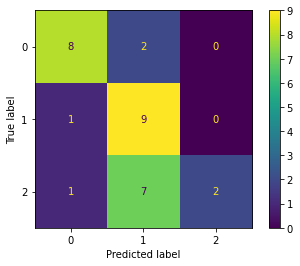

In [16]:
# Confusion Matrix
plot_confusion_matrix(dtc_model, X_test, y_test)

[Text(181.35000000000002, 199.32, 'X[1] <= 0.398\ngini = 0.665\nsamples = 124\nvalue = [42, 44, 38]'),
 Text(111.60000000000001, 163.07999999999998, 'X[7] <= 0.248\ngini = 0.552\nsamples = 84\nvalue = [5, 42, 37]'),
 Text(55.800000000000004, 126.83999999999999, 'X[5] <= 0.4\ngini = 0.111\nsamples = 34\nvalue = [0, 2, 32]'),
 Text(27.900000000000002, 90.6, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]'),
 Text(83.7, 90.6, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(167.4, 126.83999999999999, 'X[3] <= 0.522\ngini = 0.34\nsamples = 50\nvalue = [5, 40, 5]'),
 Text(139.5, 90.6, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(195.3, 90.6, 'X[5] <= 0.345\ngini = 0.651\nsamples = 13\nvalue = [5, 3, 5]'),
 Text(139.5, 54.359999999999985, 'X[6] <= 0.517\ngini = 0.408\nsamples = 7\nvalue = [0, 2, 5]'),
 Text(111.60000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(167.4, 18.119999999999976, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(25

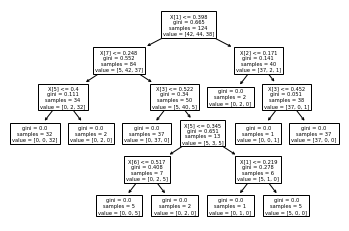

In [23]:
# Plot Decision Tree
tree.plot_tree(dtc_model)

In [30]:
import graphviz 
dot_data = tree.export_graphviz(dtc_model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("DTC") 

'DTC.pdf'

## Model
### Training & Testing
### Type: Random Forest Classifier

* Here I fit the model to a Random Forest Classifier
* This is done in a similar method to the Decision Tree Classifier as shown above

In [18]:
rfc_model = RandomForestClassifier(n_estimators=10)
rfc_model = rfc_model.fit(X_train, y_train)

In [19]:
# Train Accuracy Score
rfc_train_score = rfc_model.score(X_train, y_train)
print("Train Score: %0.6f " % (rfc_train_score))

# Test Accuracy Score
rfc_test_score = rfc_model.score(X_test, y_test)
print("Test Score: %0.6f " % (rfc_test_score))

Train Score: 0.991935 
Test Score: 0.800000 


In [20]:
# Generate prediction score from training data 
rfc_train_predictions = rfc_model.predict(X_train)
print("Training Predictions: \n", rfc_train_predictions)
print()
# Generate prediction score from testing data
rfc_test_predictions = rfc_model.predict(X_test)
print("Testing Predictions: \n", rfc_test_predictions)

Training Predictions: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]

Testing Predictions: 
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 2 1 2 2 0 2 0 2]


In [21]:
# Generate the accuracy using cross-validation for 5 folds
rfc_train_score = cross_val_score(rfc_model, X_train, y_train, cv=5)
print("Cross Validation Training Accuracy: %0.6f (+/- %0.2f)" % (rfc_train_score.mean(), rfc_train_score.std() * 2))

# Generate the accuracy using cross-validation for 5 folds
rfc_test_score = cross_val_score(rfc_model, X_test, y_test, cv=5)
print("Cross Validation Testing Accuracy: %0.6f (+/- %0.2f)" % (rfc_test_score.mean(), rfc_test_score.std() * 2))

Cross Validation Training Accuracy: 0.902667 (+/- 0.11)
Cross Validation Testing Accuracy: 0.966667 (+/- 0.13)


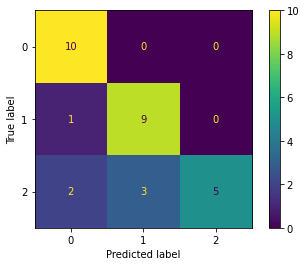

In [22]:
# Confusion Matrix
plot_confusion_matrix(rfc_model, X_test, y_test)